<a href="https://colab.research.google.com/github/julianovale/PO240_Meta_heuristica/blob/main/PO240_Semana05d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo de designação generalizada

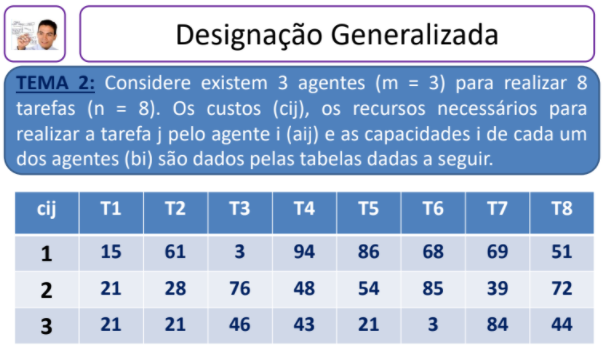

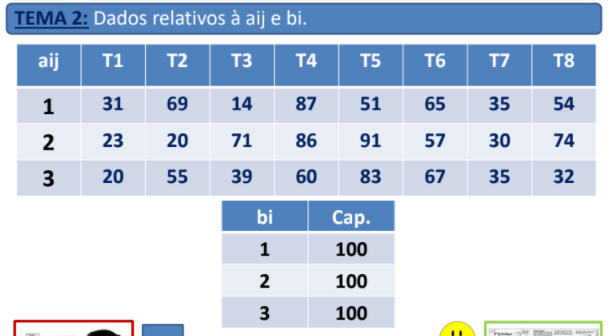

In [1]:
# instalação e importação = rodar 2 vezes
! pip install ortools
from ortools.linear_solver import pywraplp

In [1]:
from ortools.linear_solver import pywraplp

# Dados do problema.
# Custos de alocação do consultor i para cada tarefa j.
costs = [
        [15,  61,  3,  94, 86, 68, 69, 51],
        [21,  28, 76,  48, 54, 85, 39, 72],
        [21,  21, 46,  43, 21,  3, 84, 44]
        ]
# Matriz com gasto de horas do consultor i em cada tarefa j.        
a = [ 
      [31, 69, 14, 87, 51, 65, 35, 54],
      [23, 20, 71, 86, 91, 57, 30, 74],
      [20, 55, 39, 60, 83, 67, 35, 32]
    ] 

# Capacidade dos consultores.
f = [100, 100, 100]
# Demanda das tarefas.
d = [1, 1, 1, 1, 1, 1, 1, 1]

num_consultores = len(costs)
num_tarefas = len(costs[0])

# Solver
# Criando uma interface para usar o solver.
solver = pywraplp.Solver('Modelo de Designação Generalizada', pywraplp.Solver.CBC_MIXED_INTEGER_PROGRAMMING)

# Variáveis
# x[i, j] é uma matriz de alocações do consultor i
# para a tarefa j.
x = {}
for i in range(num_consultores):
  for j in range(num_tarefas):
    x[i,j] = solver.IntVar(0, 1, '')

# Restrições
# Para cada máquina a soma das alocações para um
# consultor não pode exceder sua capacidade de produção.
for i in range(num_consultores):
  solver.Add(solver.Sum([a[i][j]*x[i, j] for j in range(num_tarefas)]) <= f[i],name='RConsultores '+str(i))

# Para cada mercado a soma dos fluxos de entrada
# deve atender a demanda.
for j in range(num_tarefas):
  solver.Add(solver.Sum([x[i, j] for i in range(num_consultores)]) == d[j],name='RTarefas '+str(j))

# Função Objetivo.
objective_terms = []
for i in range(num_consultores):
  for j in range(num_tarefas):
    objective_terms.append(costs[i][j] * x[i, j])
solver.Minimize(solver.Sum(objective_terms))

# Resolve
status = solver.Solve()

# Relatório da solução.
if status == pywraplp.Solver.OPTIMAL or status == pywraplp.Solver.FEASIBLE:
    print('Custo total = ', solver.Objective().Value(), '\n')
    for i in range(num_consultores):
      cap = 0
      print('O consultor %d foi alocado para a: ' % (i+1))  
      for j in range(num_tarefas):
          # Test if x[i,j] is 1 (with tolerance for floating point arithmetic).
          if x[i, j].solution_value() == 1:
            print('Tarefa %d com custo %8.2f e gasto de recurso % 8.2f' %
                  (j+1, costs[i][j], a[i][j]))
            cap = cap + a[i][j]
      print('Capacidade total do consultor utilizada: %8.2f %% ' % ((cap/f[i])*100))
      print('-----------------------\n')

Custo total =  379.0 

O consultor 1 foi alocado para a: 
Tarefa 3 com custo     3.00 e gasto de recurso    14.00
Tarefa 5 com custo    86.00 e gasto de recurso    51.00
Tarefa 7 com custo    69.00 e gasto de recurso    35.00
Capacidade total do consultor utilizada:   100.00 % 
-----------------------

O consultor 2 foi alocado para a: 
Tarefa 1 com custo    21.00 e gasto de recurso    23.00
Tarefa 2 com custo    28.00 e gasto de recurso    20.00
Tarefa 6 com custo    85.00 e gasto de recurso    57.00
Capacidade total do consultor utilizada:   100.00 % 
-----------------------

O consultor 3 foi alocado para a: 
Tarefa 4 com custo    43.00 e gasto de recurso    60.00
Tarefa 8 com custo    44.00 e gasto de recurso    32.00
Capacidade total do consultor utilizada:    92.00 % 
-----------------------



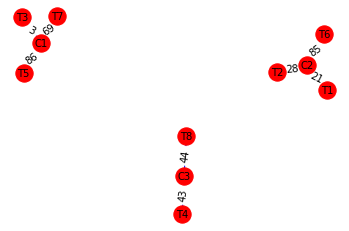

In [5]:
# Criação do grafo

# importando bibliotecas
import networkx as nx
import matplotlib.pyplot as plt

# cria o grafo vazio
G = nx.Graph()

# adiciona os nós das fábricas
for i in range(num_consultores):
  node = 'C'+str(i+1)
  G.add_node(node, size=10, label=node)

# adiciona os nós dos tarefas
for j in range(num_tarefas):
  node = 'T'+str(j+1)
  G.add_node(node, size=10, label=node)

# adiciona os arcos
for i in range(num_consultores):
  for j in range(num_tarefas):
     if (x[i, j].solution_value()>0):
      G.add_edge('C'+str(i+1), 'T'+str(j+1), element=str(costs[i][j]))

# criando ambiente
pos = nx.spring_layout(G)
edge_labels = dict([((u, v), G.get_edge_data(u, v)['element']) for u, v in G.edges])
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
nx.draw(G, pos, font_size=10, node_color='red', edge_color='blue', with_labels=True)